# Final Assesment Reference Code


# **Cleaning and Wrangling**

In [1]:
import sklearn as sk
import sklearn.datasets as skd
import sklearn.cluster as skc

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

In [3]:
#set up list from headings obtained from LEARN
location = ['aberporth','armagh','ballypatrick','bradford','braemar','camborne','cambridge','cardiff','chivenor','cwmystwyth','dunstaffnage','durham','eastbourne','eskdalemuir','heathrow','hurn','lerwick','leuchars','lowestoft','manston','nairn','newtonrigg','oxford','paisley','ringway','rossonwye','shawbury','sheffield','southampton','stornoway','suttonbonington','tiree','valley','waddington','whitby','wickairport','yeovilton']
len(location)
location_class = location[:-5]
len(location_class)
len(location_class)

32

In [4]:
import requests
#Download station names from 'location' lists to local file
for x in location:
    url = 'http://www.metoffice.gov.uk/pub/data/weather/uk/climate/stationdata/' + x + 'data.txt'
    r = requests.get(url, allow_redirects=True)

    open(x,'wb').write(r.content)


In [4]:
# Create new list to append clean station data to.
Cleaned_station_data = []
# clean historic weather station data and append to new list 'Cleaned_station_data' by entering in list named 'location'
def Clean_weather_data(station_list):  
    
    for x in station_list:
        #Read iterated list into a dataframe
        #Adding column 'extra' to handle extra comments, will be deleted futher down
        df = pd.read_table(x, delim_whitespace=True, names=('yyyy', 'mm', 'tmax_degC','tmin_degC','af_days','rain_mm','sun_hours','extra'))
        df = df[7:] #Filter out first 8 rows
        df = df.apply(pd.to_numeric, errors = 'ignore')#Change strings to int or floats where it can 
        df = df.drop(labels = 'extra', axis = 1)#Drop 'extra' column
        df = df.reset_index(drop=True)#Reset index
        Cleaned_station_data.append(df)#Add clean data to new list
        
        
#Run function
Clean_weather_data(location)

#printing the new list will show the clean datasets have been added to the new list
print(Cleaned_station_data)

[     yyyy  mm tmax_degC tmin_degC af_days  rain_mm sun_hours
0    1941   1       ---       ---     ---     74.7       ---
1    1941   2       ---       ---     ---     69.1       ---
2    1941   3       ---       ---     ---     76.2       ---
3    1941   4       ---       ---     ---     33.7       ---
4    1941   5       ---       ---     ---     51.3       ---
..    ...  ..       ...       ...     ...      ...       ...
961  2021   2       7.9       2.9       6    119.4     60.6#
962  2021   3       9.8       4.6       3     38.8     94.7#
963  2021   4      10.9       3.9       0     10.6    255.4#
964  2021   5      12.7       7.0       0    142.6    157.4#
965  2021   6      17.4      11.0       0     18.0    139.5#

[966 rows x 7 columns],       yyyy  mm tmax_degC tmin_degC af_days rain_mm sun_hours
0     1853   1       ---       ---     ---    57.3       ---
1     1853   2       ---       ---     ---    32.3       ---
2     1853   3       ---       ---     ---    65.5       --

In [109]:
report_example = Cleaned_station_data[6].head(11)
report_example

,yyyy,mm,tmax_degC,tmin_degC,af_days,rain_mm,sun_hours
0,1959,1,4.4,-1.4,20,---,78.1
1,1959,2,7.5,1.2,9,---,66.0
2,1959,3,11.5,3.8,0,---,98.0
3,1959,4,14.3,5.4,0,---,146.1
4,1959,5,18.1,6.5,0,---,224.8
5,1959,6,21.6,10.1,0,---,252.4
6,1959,7,23.9,12.2,0,---,270.7
7,1959,8,23.5,13.0,0,---,213.4
8,1959,9,21.7,9.0,0,---,171.3
9,1959,10,18.0,7.5,0,---,167.6


In [58]:
Concat_df = pd.concat(Cleaned_station_data, keys=location)




In [59]:
Concat_df['tmax_degC'] = pd.to_numeric(Concat_df['tmax_degC'], errors = 'coerce')
Concat_df['tmin_degC'] = pd.to_numeric(Concat_df['tmin_degC'], errors = 'coerce')
Concat_df['yyyy'] = pd.to_numeric(Concat_df['yyyy'], errors = 'coerce')
Concat_df['rain_mm'] = pd.to_numeric(Concat_df['rain_mm'], errors = 'coerce')
Concat_df['mm'] = pd.to_numeric(Concat_df['mm'], errors = 'coerce')
Concat_df['af_days'] = pd.to_numeric(Concat_df['af_days'], errors = 'coerce')
Concat_df['sun_hours'] = pd.to_numeric(Concat_df['sun_hours'], errors = 'coerce')

Concat_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 38183 entries, ('aberporth', 0) to ('yeovilton', 681)
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   yyyy       38175 non-null  float64
 1   mm         38175 non-null  float64
 2   tmax_degC  36537 non-null  float64
 3   tmin_degC  36620 non-null  float64
 4   af_days    35193 non-null  float64
 5   rain_mm    36659 non-null  float64
 6   sun_hours  25302 non-null  float64
dtypes: float64(7)
memory usage: 2.2+ MB


# **Question 1: Clustering**

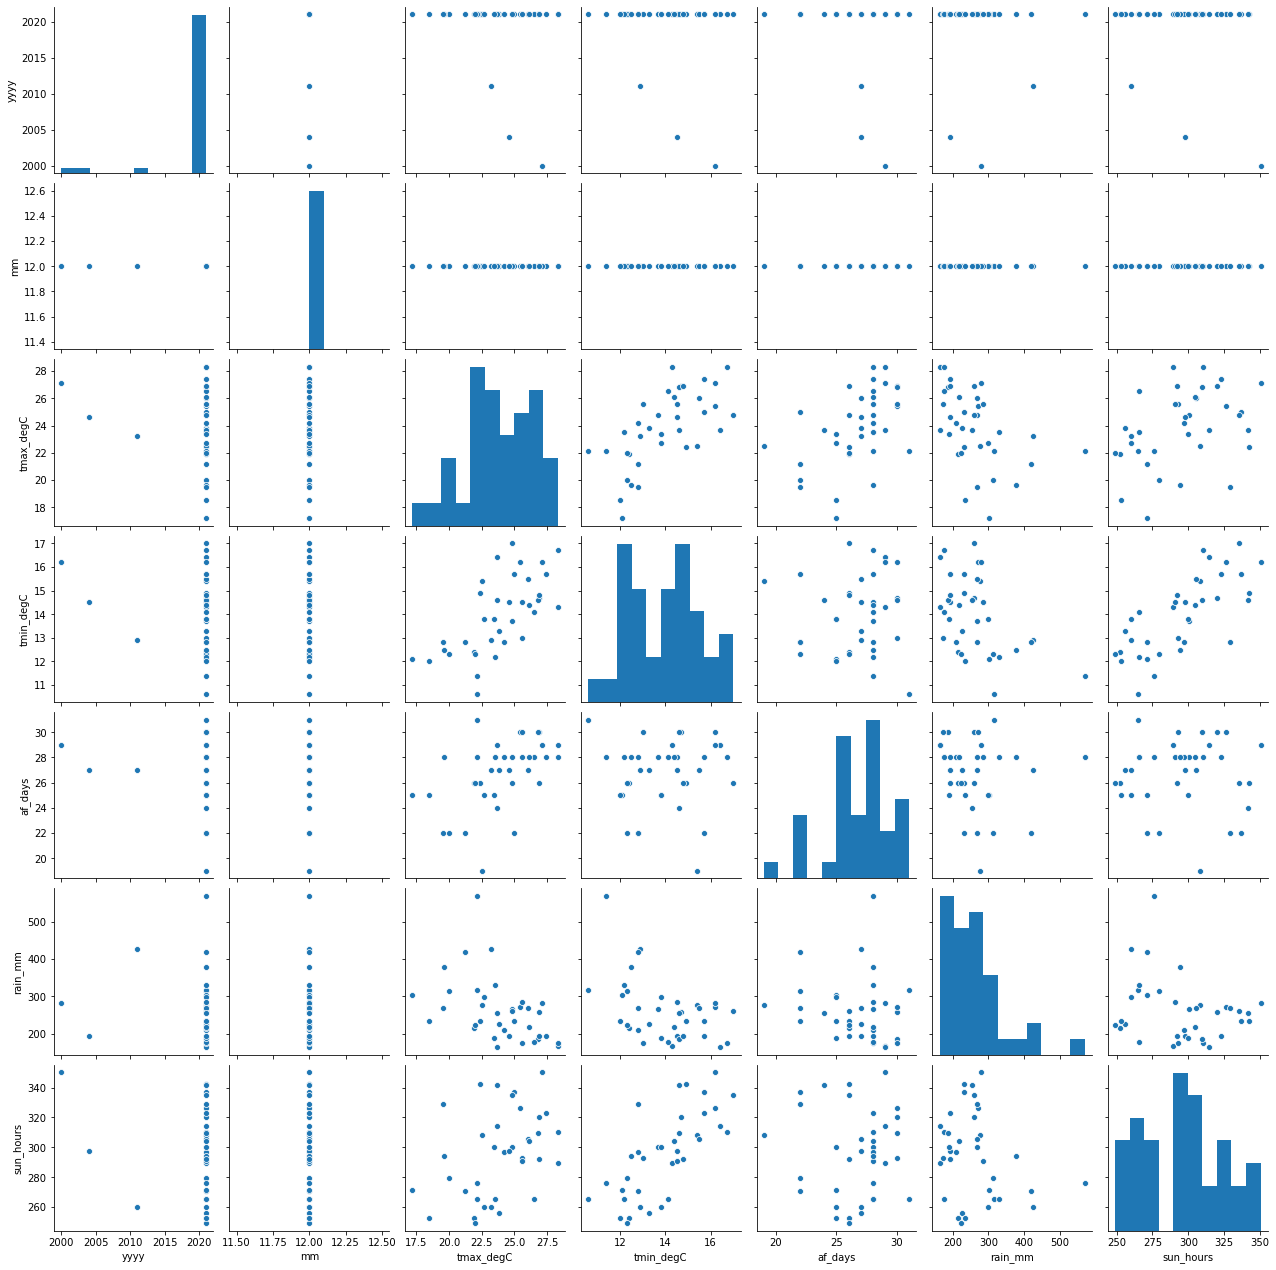

In [14]:
import seaborn as sns
sns.pairplot(Concat_df.loc[location][['yyyy','mm','tmax_degC','tmin_degC','af_days','rain_mm','sun_hours']].max(level=0))

In [15]:
x = Concat_df[['sun_hours','tmin_degC']]
x = x.max(level=0)


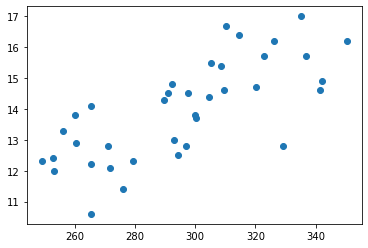

In [16]:
import matplotlib
normalize = matplotlib.colors.Normalize(vmin=-1, vmax=1)
plt.scatter(x['sun_hours'],x['tmin_degC'],norm=normalize)

In [17]:
model = skc.KMeans(n_clusters=3)

In [18]:
model.fit(x).score(x)

-2763.6812991452975

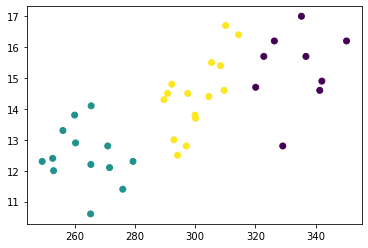

In [19]:
plt.scatter(x['sun_hours'],x['tmin_degC'],c=model.labels_) 

# **Question 2: Classification**

In [20]:
import sklearn as sk
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [21]:
coordinates = [52.13914,54.35234,55.18062,53.81341,57.00612,50.21782,52.24501,51.48783,51.08865,52.35817,56.45054,54.76786,50.76167,55.311,51.47872,50.7789,60.13946,56.37745,52.48323,51.34597,57.593,54.6699,51.76073,55.8455,53.356,51.91075,52.79433,53.38101,50.89822,58.21382,52.8331,56.49999,53.25238,53.17509,54.48073,58.45406,51.00586]
latitude = []
for i in coordinates:
    if (i >= 49.9) and (i <=53.57):
        latitude.append(0)
    elif (i >= 53.58) and (i <= 57.24):
        latitude.append(1)
    else:
        latitude.append(2)
y = latitude


In [22]:
classifier = KNeighborsClassifier()

In [23]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.15, random_state = 0)

In [24]:
X_train

,sun_hours,tmin_degC
hurn,320.1,14.7
durham,297.0,12.8
ballypatrick,279.3,12.3
rossonwye,309.6,14.6
suttonbonington,265.4,14.1
valley,341.4,14.6
yeovilton,292.2,14.8
whitby,299.9,13.8
stornoway,294.1,12.5
waddington,304.5,14.4


In [25]:
X_test

,sun_hours,tmin_degC
oxford,322.8,15.7
nairn,249.1,12.3
lerwick,271.5,12.1
dunstaffnage,270.9,12.8
tiree,329.1,12.8
southampton,350.3,16.2


In [26]:
X_train.shape

(31, 2)

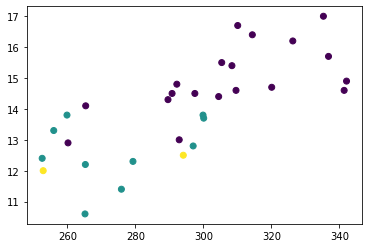

In [27]:
plt.scatter(X_train['sun_hours'], X_train['tmin_degC'],c=y_train)


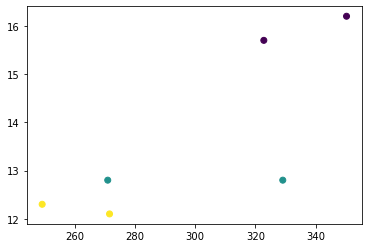

In [28]:
plt.scatter(X_test['sun_hours'], X_test['tmin_degC'],c=y_test)

In [29]:
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [30]:
pred = classifier.predict(X_test)
pred


array([0, 1, 1, 1, 0, 0])

In [34]:
X_test

,sun_hours,tmin_degC
oxford,322.8,15.7
nairn,249.1,12.3
lerwick,271.5,12.1
dunstaffnage,270.9,12.8
tiree,329.1,12.8
southampton,350.3,16.2


In [31]:
pred.shape

(6,)

0.5


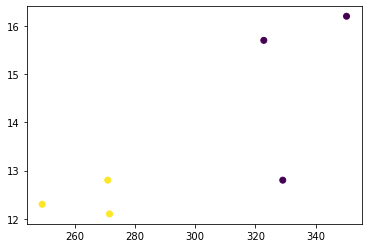

In [32]:
plt.scatter(X_test['sun_hours'], X_test['tmin_degC'],c=pred)
print(accuracy_score(y_test, pred))

In [35]:
#Run model again with a different set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.15, random_state = 1)

In [36]:
X_train

,sun_hours,tmin_degC
newtonrigg,265.3,12.2
wickairport,252.9,12.0
manston,326.3,16.2
ringway,297.5,14.5
suttonbonington,265.4,14.1
leuchars,252.6,12.4
southampton,350.3,16.2
whitby,299.9,13.8
tiree,329.1,12.8
shawbury,292.9,13.0


In [38]:
X_test

,sun_hours,tmin_degC
ballypatrick,279.3,12.3
stornoway,294.1,12.5
bradford,300.1,13.7
oxford,322.8,15.7
rossonwye,309.6,14.6
sheffield,290.8,14.5


In [39]:
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [40]:
pred = classifier.predict(X_test)
pred


array([0, 0, 0, 0, 0, 0])

In [41]:
print(accuracy_score(y_test, pred))

0.5


# **Question 3: Linear Regression on Happiness and weather**

In [42]:
coordinates = [52.13914,54.35234,55.18062,53.81341,57.00612,50.21782,52.24501,51.48783,51.08865,52.35817,56.45054,54.76786,50.76167,55.311,51.47872,50.7789,60.13946,56.37745,52.48323,51.34597,57.593,54.6699,51.76073,55.8455,53.356,51.91075,52.79433,53.38101,50.89822,58.21382,52.8331,56.49999,53.25238,53.17509,54.48073,58.45406,51.00586]
region_code = [9,11,11,2,10,8,5,9,8,9,10,0,7,10,6,8,10,10,5,7,10,1,7,10,1,4,4,2,7,10,3,10,0,3,2,10,8]
len(region_code)

37

In [71]:

Regions = ['NORTH EAST',' NORTH WEST','YORKSHIRE AND THE HUMBER','EAST MIDLANDS','WEST MIDLANDS','EAST','LONDON','SOUTH EAST','SOUTH WEST','WALES','SCOTLAND','NORTHERN IRELAND']
reg_num = [0,1,2,3,4,5,6,7,8,9,10,11,10,]
avg_happyness = [7.34,7.39,7.41,7.51,7.43,7.51,7.38,7.54,7.50,7.44,7.45,7.75]
avg_happy_score = [7.44,7.75,7.75,7.41,7.45,7.50,7.51,7.44,7.50,7.44,7.45,7.34,7.54,7.45,7.38,7.50,7.45,7.45,7.51,7.54,7.45,7.39,7.54,7.45,7.39,7.43,7.43,7.41,7.54,7.45,7.51,7.45,7.34,7.51,7.39,7.45,7.50]
Combined_df = Concat_df.max(level=0)
Combined_df['regions'] = region_code
Combined_df['avg_happy_score'] = avg_happy_score
Combined_df

,yyyy,mm,tmax_degC,tmin_degC,af_days,rain_mm,sun_hours,regions,avg_happy_score
aberporth,2021.0,12.0,22.4,14.9,26.0,232.3,342.1,9,7.44
armagh,2021.0,12.0,23.8,13.3,27.0,226.4,256.0,11,7.75
ballypatrick,2021.0,12.0,20.0,12.3,22.0,313.0,279.3,11,7.75
bradford,2021.0,12.0,24.8,13.7,28.0,266.8,300.1,2,7.41
braemar,2021.0,12.0,22.1,10.6,31.0,316.8,265.2,10,7.45
camborne,2021.0,12.0,22.5,15.4,19.0,276.7,308.4,8,7.50
cambridge,2021.0,12.0,28.3,14.3,29.0,166.2,289.6,5,7.51
cardiff,2021.0,12.0,26.0,15.5,27.0,267.6,305.4,9,7.44
chivenor,2021.0,12.0,25.0,15.7,22.0,233.0,336.8,8,7.50
cwmystwyth,2011.0,12.0,23.2,12.9,27.0,425.4,260.2,9,7.44


In [72]:
Combined_df.head()

,yyyy,mm,tmax_degC,tmin_degC,af_days,rain_mm,sun_hours,regions,avg_happy_score
aberporth,2021.0,12.0,22.4,14.9,26.0,232.3,342.1,9,7.44
armagh,2021.0,12.0,23.8,13.3,27.0,226.4,256.0,11,7.75
ballypatrick,2021.0,12.0,20.0,12.3,22.0,313.0,279.3,11,7.75
bradford,2021.0,12.0,24.8,13.7,28.0,266.8,300.1,2,7.41
braemar,2021.0,12.0,22.1,10.6,31.0,316.8,265.2,10,7.45


In [374]:
plt.rcParams["figure.figsize"] = [8,6]
corr = Combined_df.corr()
corr

,yyyy,mm,tmax_degC,tmin_degC,af_days,rain_mm,sun_hours,regions,avg_happy_score
yyyy,1.000000,NaN,-0.161159,-0.169748,-0.127845,-0.066844,-0.173865,0.114547,0.016973
mm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tmax_degC,-0.161159,NaN,1.000000,0.658059,0.501924,-0.457342,0.395540,-0.483151,-0.004367
tmin_degC,-0.169748,NaN,0.658059,1.000000,0.048377,-0.457358,0.731808,-0.256724,0.100950
af_days,-0.127845,NaN,0.501924,0.048377,1.000000,-0.149804,-0.008231,-0.293663,-0.115688
rain_mm,-0.066844,NaN,-0.457342,-0.457358,-0.149804,1.000000,-0.242340,0.398118,-0.015274
sun_hours,-0.173865,NaN,0.395540,0.731808,-0.008231,-0.242340,1.000000,-0.271938,-0.055899
regions,0.114547,NaN,-0.483151,-0.256724,-0.293663,0.398118,-0.271938,1.000000,0.485141
avg_happy_score,0.016973,NaN,-0.004367,0.100950,-0.115688,-0.015274,-0.055899,0.485141,1.000000


In [67]:
Combined_df = Combined_df.drop('regions', axis = 1)
Combined_df = Combined_df.drop('yyyy', axis = 1)
Combined_df = Combined_df.drop('mm', axis = 1)
Combined_df


,tmax_degC,tmin_degC,af_days,rain_mm,sun_hours,avg_happy_score
aberporth,22.4,14.9,26.0,232.3,342.1,7.44
armagh,23.8,13.3,27.0,226.4,256.0,7.75
ballypatrick,20.0,12.3,22.0,313.0,279.3,7.75
bradford,24.8,13.7,28.0,266.8,300.1,7.41
braemar,22.1,10.6,31.0,316.8,265.2,7.45
camborne,22.5,15.4,19.0,276.7,308.4,7.50
cambridge,28.3,14.3,29.0,166.2,289.6,7.51
cardiff,26.0,15.5,27.0,267.6,305.4,7.44
chivenor,25.0,15.7,22.0,233.0,336.8,7.50
cwmystwyth,23.2,12.9,27.0,425.4,260.2,7.44


In [69]:
Combined_df.head()

,tmax_degC,tmin_degC,af_days,rain_mm,sun_hours,avg_happy_score
aberporth,22.4,14.9,26.0,232.3,342.1,7.44
armagh,23.8,13.3,27.0,226.4,256.0,7.75
ballypatrick,20.0,12.3,22.0,313.0,279.3,7.75
bradford,24.8,13.7,28.0,266.8,300.1,7.41
braemar,22.1,10.6,31.0,316.8,265.2,7.45


In [68]:
plt.rcParams["figure.figsize"] = [8,6]
corr = Combined_df.corr()
corr

,tmax_degC,tmin_degC,af_days,rain_mm,sun_hours,avg_happy_score
tmax_degC,1.000000,0.658059,0.501924,-0.457342,0.395540,-0.004367
tmin_degC,0.658059,1.000000,0.048377,-0.457358,0.731808,0.100950
af_days,0.501924,0.048377,1.000000,-0.149804,-0.008231,-0.115688
rain_mm,-0.457342,-0.457358,-0.149804,1.000000,-0.242340,-0.015274
sun_hours,0.395540,0.731808,-0.008231,-0.242340,1.000000,-0.055899
avg_happy_score,-0.004367,0.100950,-0.115688,-0.015274,-0.055899,1.000000


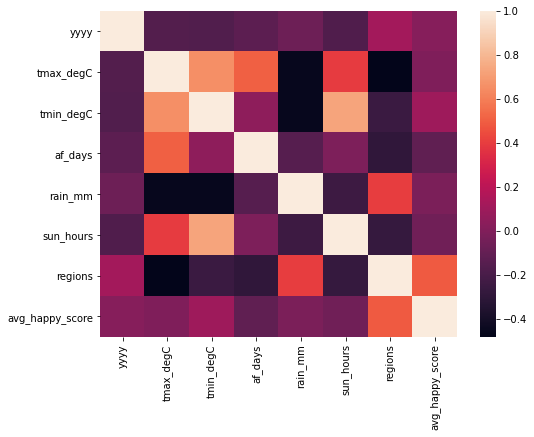

In [384]:
sns.heatmap(corr)

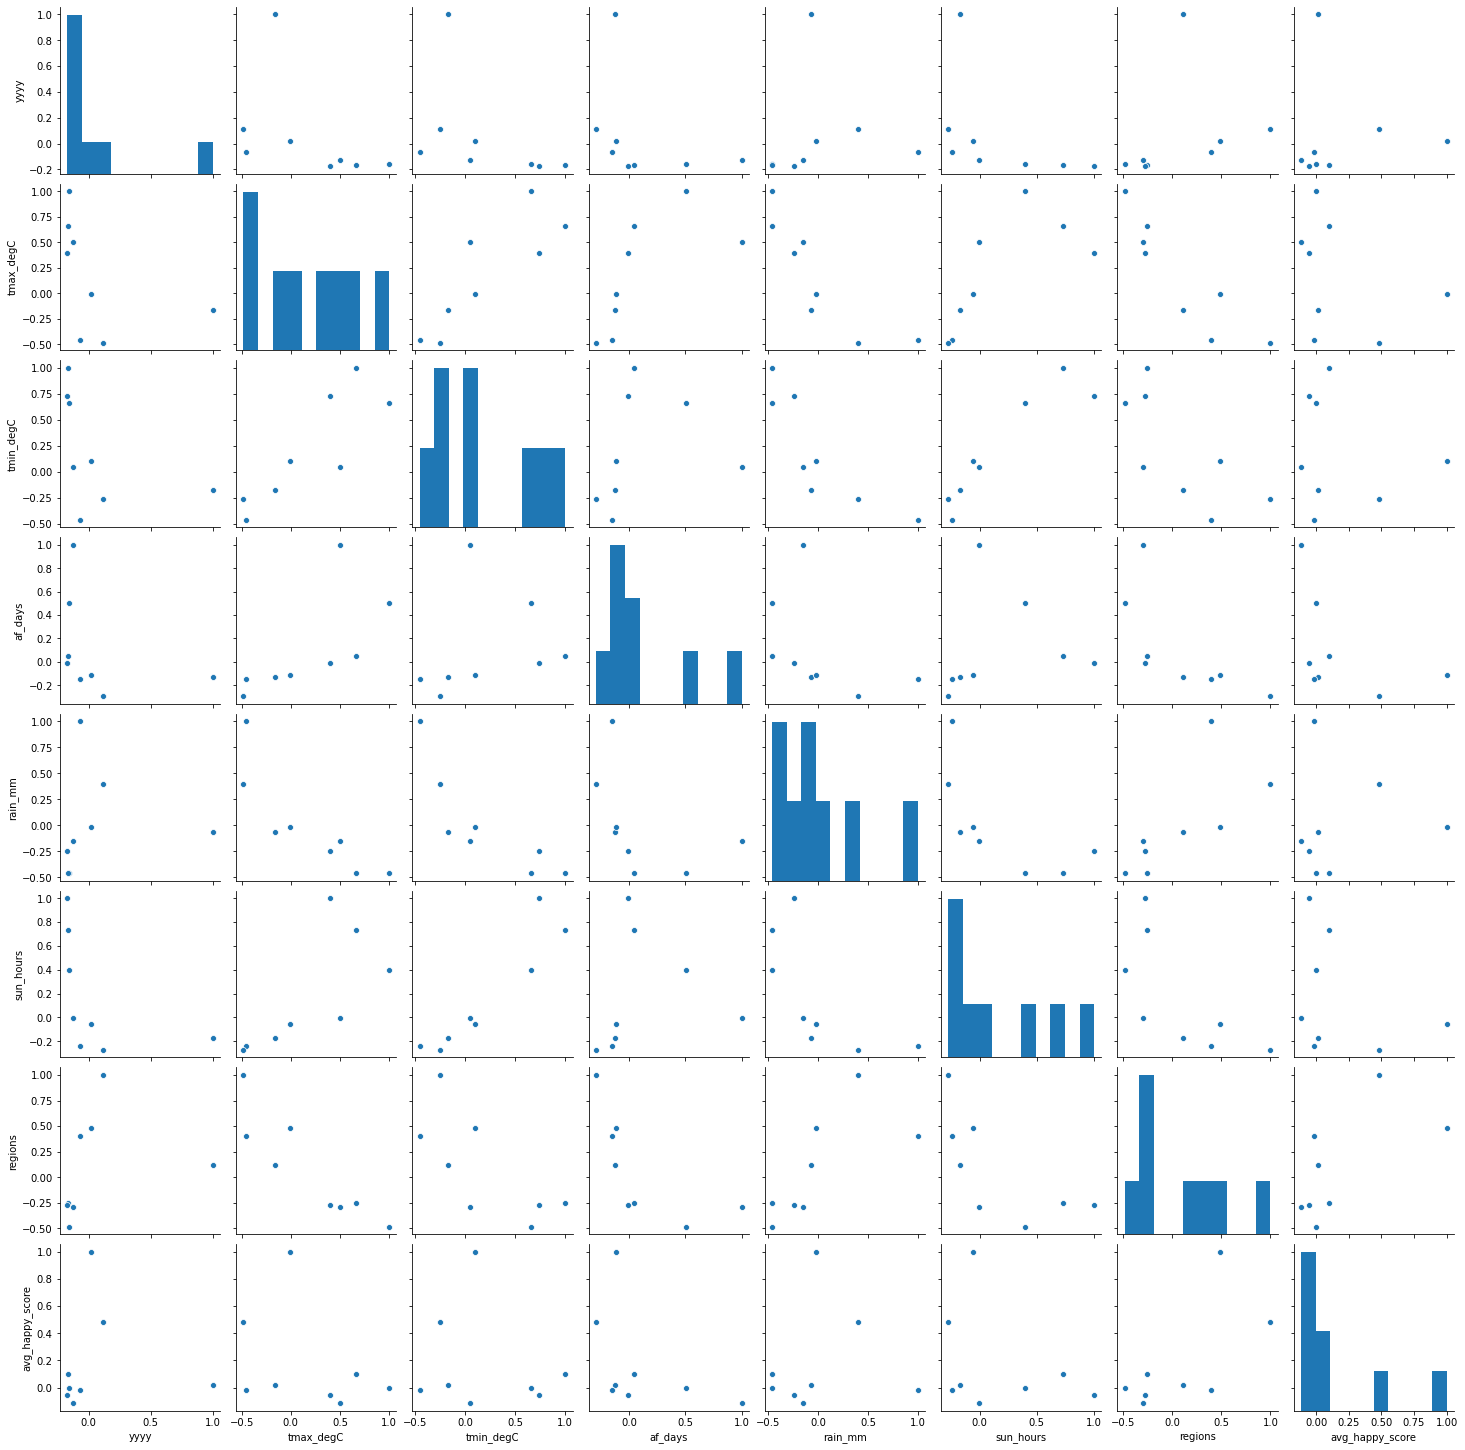

In [385]:
sns.pairplot(corr)

In [75]:
X = Combined_df.drop(['avg_happy_score','yyyy','mm','regions'], axis=1)
y = Combined_df.filter(['avg_happy_score'], axis=1)
print(X,y)

                 tmax_degC  tmin_degC  af_days  rain_mm  sun_hours
aberporth             22.4       14.9     26.0    232.3      342.1
armagh                23.8       13.3     27.0    226.4      256.0
ballypatrick          20.0       12.3     22.0    313.0      279.3
bradford              24.8       13.7     28.0    266.8      300.1
braemar               22.1       10.6     31.0    316.8      265.2
camborne              22.5       15.4     19.0    276.7      308.4
cambridge             28.3       14.3     29.0    166.2      289.6
cardiff               26.0       15.5     27.0    267.6      305.4
chivenor              25.0       15.7     22.0    233.0      336.8
cwmystwyth            23.2       12.9     27.0    425.4      260.2
dunstaffnage          21.2       12.8     22.0    417.8      270.9
durham                24.2       12.8     28.0    209.7      297.0
eastbourne            24.8       17.0     26.0    261.1      335.3
eskdalemuir           22.1       11.4     28.0    568.8      2

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)

In [87]:
y_test.index.tolist()

['leuchars',
 'eskdalemuir',
 'braemar',
 'stornoway',
 'wickairport',
 'rossonwye',
 'cambridge',
 'shawbury']

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [78]:
Happy_Regression = LinearRegression()
Happy_Regression.fit(X_train, y_train)
y_pred = Happy_Regression.predict(X_test)

In [79]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Square Error:', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 0.030400579232095493
Mean Square Error: 0.0013349553762227683
Root Mean Squared Error: 0.036537041153092406


In [88]:
Comparison_df = pd.DataFrame({'Station_name':y_test.index.tolist() ,'Actual': y_test.values.tolist(),'Predicted': y_pred.tolist()})
Comparison_df

,Station_name,Actual,Predicted
0,leuchars,[7.45],[7.490989216614223]
1,eskdalemuir,[7.45],[7.427084869441337]
2,braemar,[7.45],[7.411283698196829]
3,stornoway,[7.45],[7.457208773749319]
4,wickairport,[7.45],[7.506007422463939]
5,rossonwye,[7.43],[7.444256562606438]
6,cambridge,[7.51],[7.4502317027435705]
7,shawbury,[7.43],[7.426657071195418]
